<a href="https://colab.research.google.com/github/JonathanPuertaG/challenge-telecom-x-parte-2/blob/main/Telecom_X2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**📌 Extracción**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
df = pd.read_csv("/content/datos_tratados.csv")
df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias,rango_tenure
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667,7-12
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667,7-12
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333,0-6
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667,13-24
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667,0-6


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   Churn             7032 non-null   object 
 2   gender            7032 non-null   object 
 3   SeniorCitizen     7032 non-null   int64  
 4   Partner           7032 non-null   object 
 5   Dependents        7032 non-null   object 
 6   tenure            7032 non-null   int64  
 7   PhoneService      7032 non-null   object 
 8   MultipleLines     7032 non-null   object 
 9   InternetService   7032 non-null   object 
 10  OnlineSecurity    7032 non-null   object 
 11  OnlineBackup      7032 non-null   object 
 12  DeviceProtection  7032 non-null   object 
 13  TechSupport       7032 non-null   object 
 14  StreamingTV       7032 non-null   object 
 15  StreamingMovies   7032 non-null   object 
 16  Contract          7032 non-null   object 


##**🔧 Preparación de los datos**

In [ ]:
## Eliminar columnas irrelevantes
df = df.drop(['customerID', 'rango_tenure', 'Cuentas_Diarias'], axis=1)

In [ ]:
df.columns

Index(['Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'Charges.Monthly', 'Charges.Total'],
      dtype='object')

In [ ]:
## Revision de columnas tipo object
cols_to_fix = [
    'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'
]

for col in cols_to_fix:
    if col in df.columns:
        display(df[col].value_counts(dropna=False))
        display("-" * 30)

,count
PhoneService,
Yes,6352
No,680


'------------------------------'

,count
MultipleLines,
No,3385
Yes,2967
No phone service,680


'------------------------------'

,count
InternetService,
Fiber optic,3096
DSL,2416
No,1520


'------------------------------'

,count
OnlineSecurity,
No,3497
Yes,2015
No internet service,1520


'------------------------------'

,count
OnlineBackup,
No,3087
Yes,2425
No internet service,1520


'------------------------------'

,count
DeviceProtection,
No,3094
Yes,2418
No internet service,1520


'------------------------------'

,count
TechSupport,
No,3472
Yes,2040
No internet service,1520


'------------------------------'

,count
StreamingTV,
No,2809
Yes,2703
No internet service,1520


'------------------------------'

,count
StreamingMovies,
No,2781
Yes,2731
No internet service,1520


'------------------------------'

,count
Contract,
Month-to-month,3875
Two year,1685
One year,1472


'------------------------------'

,count
PaperlessBilling,
Yes,4168
No,2864


'------------------------------'

,count
PaymentMethod,
Electronic check,2365
Mailed check,1604
Bank transfer (automatic),1542
Credit card (automatic),1521


'------------------------------'

In [ ]:
## se estandariza el valor "No internet service" a "No" en varias columnas relacionadas con servicios de internet
cols_to_fix = [
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

# Create df_clean by copying df
df_clean = df.copy()

for col in cols_to_fix:
    if col in df_clean.columns:
        df_clean[col] = df_clean[col].replace('No internet service', 'No')

categorical_cols = [
    'Churn', 'gender', 'Partner', 'Dependents',
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport',
    'StreamingTV', 'StreamingMovies', 'Contract',
    'PaperlessBilling', 'PaymentMethod'
]

### 🔡 ➡️ 🔢 Encoding

In [ ]:
# Seleccionar las columnas categóricas (excluyendo 'Churn' ya que es la variable objetivo)
columnas_categoricas_clean = df_clean.select_dtypes(include='object').columns.tolist()
columnas_categoricas_clean.remove('Churn')

# Aplicar codificación one-hot al DataFrame
df_codificado_clean = pd.get_dummies(df_clean, columns=columnas_categoricas_clean, drop_first=True)

# Codificar la variable objetivo 'Churn'
df_codificado_clean['Churn'] = df_codificado_clean['Churn'].map({'No': 0, 'Yes': 1})
df_codificado_clean.info()
df_codificado_clean

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Churn                                  7032 non-null   int64  
 1   SeniorCitizen                          7032 non-null   int64  
 2   tenure                                 7032 non-null   int64  
 3   Charges.Monthly                        7032 non-null   float64
 4   Charges.Total                          7032 non-null   float64
 5   gender_Male                            7032 non-null   bool   
 6   Partner_Yes                            7032 non-null   bool   
 7   Dependents_Yes                         7032 non-null   bool   
 8   PhoneService_Yes                       7032 non-null   bool   
 9   MultipleLines_No phone service         7032 non-null   bool   
 10  MultipleLines_Yes                      7032 non-null   bool   
 11  Inte

,Churn,SeniorCitizen,tenure,Charges.Monthly,Charges.Total,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,9,65.60,593.30,False,True,True,True,False,...,False,True,True,False,True,False,True,False,False,True
1,0,0,9,59.90,542.40,True,False,False,True,False,...,False,False,False,True,False,False,False,False,False,True
2,1,0,4,73.90,280.85,True,False,False,True,False,...,True,False,False,False,False,False,True,False,True,False
3,1,1,13,98.00,1237.85,True,True,False,True,False,...,True,False,True,True,False,False,True,False,True,False
4,1,1,3,83.90,267.40,False,True,False,True,False,...,False,True,True,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,0,13,55.15,742.90,False,False,False,True,False,...,False,True,False,False,True,False,False,False,False,True
7028,1,0,22,85.10,1873.70,True,True,False,True,False,...,False,False,False,True,False,False,True,False,True,False
7029,0,0,2,50.30,92.75,True,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
7030,0,0,67,67.85,4627.65,True,True,True,True,False,...,True,True,False,True,False,True,False,False,False,True


### ◔ Calcular la proporción de clientes que cancelaron

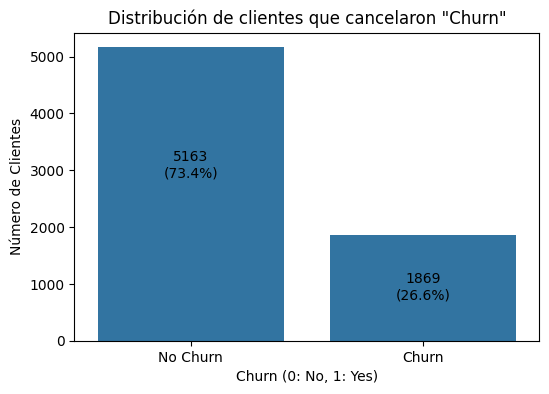

In [ ]:
# Visualizar la distribución de clientes que cancelaron 'Churn'
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='Churn', data=df_codificado_clean)
plt.title('Distribución de clientes que cancelaron "Churn"')
plt.xlabel('Churn (0: No, 1: Yes)')
plt.ylabel('Número de Clientes')
plt.xticks(ticks=[0, 1], labels=['No Churn', 'Churn'])

# Añadir valores y porcentajes en las barras
total = len(df_codificado_clean)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height * 0.65,
            '{:d}\n({:.1f}%)'.format(int(height), 100*height/total),
            ha="center", va="top") # Añade alineación vertical

plt.show()


### 📈🔄 Análisis de Correlación

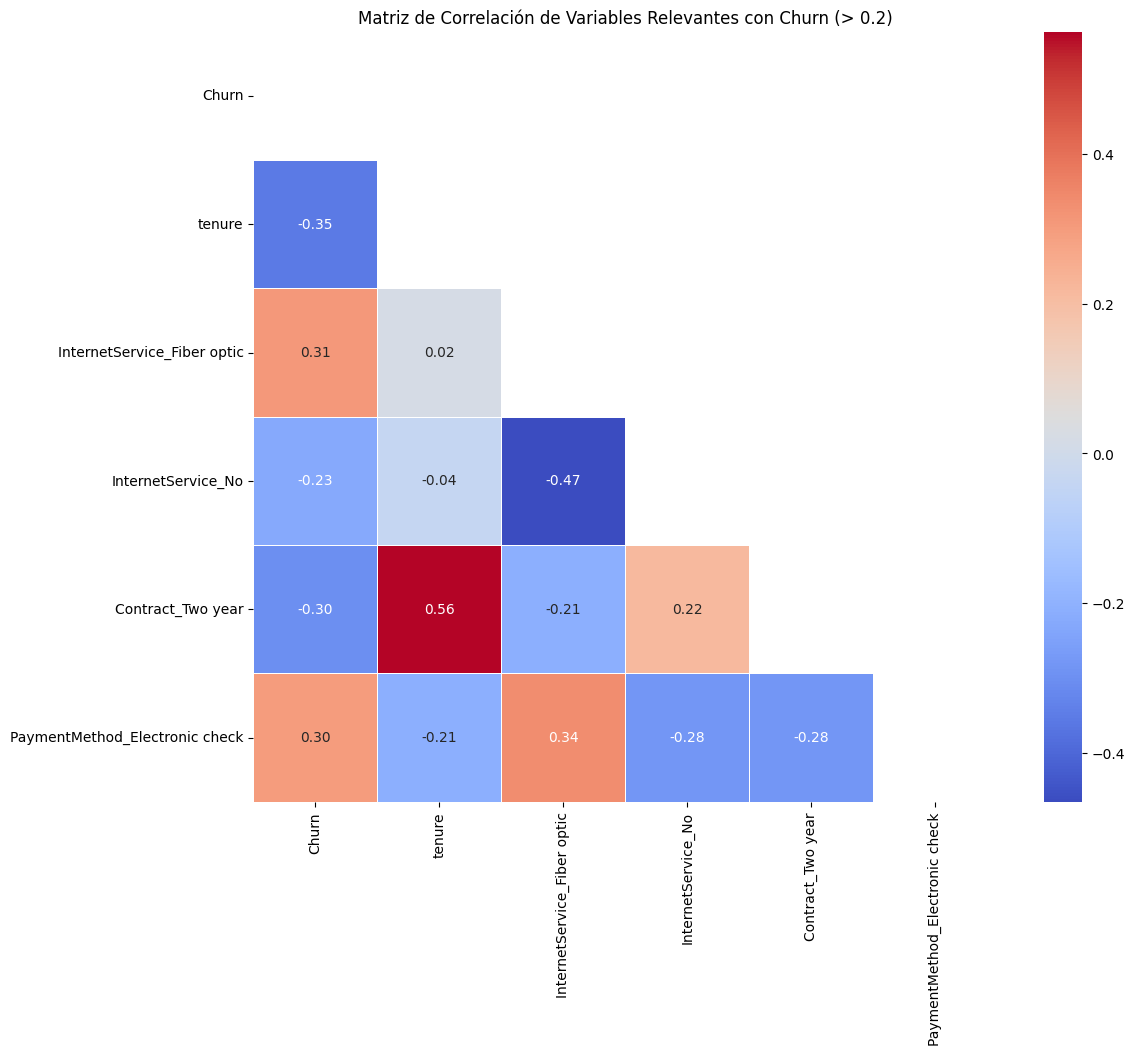

In [ ]:
# Definir la variable objetivo
target_var = 'Churn'

# Definir el umbral mínimo de correlación absoluta para la selección
limiar = 0.2

# Calcular la matriz de correlación sobre el DataFrame original codificado (antes del balanceo)
correlation_matrix_original = df_codificado_clean.corr()

# Filtrar variables que tengan correlación absoluta >= limiar con la variable objetivo
# Esto crea una lista con las variables relevantes
variables_relevantes = correlation_matrix_original.index[abs(correlation_matrix_original[target_var]) >= limiar].tolist()

# Asegurar que la variable objetivo esté en la lista
if target_var not in variables_relevantes:
    variables_relevantes.append(target_var)

# Crear una matriz de correlación solamente con las variables seleccionadas
corr_filtrada = correlation_matrix_original.loc[variables_relevantes, variables_relevantes]

# Generar una máscara para esconder el triángulo superior de la matriz
mascara = np.triu(np.ones_like(corr_filtrada, dtype=bool))

# Plotear el heatmap con la máscara aplicada para mejor visualización
plt.figure(figsize=(12,10))
sns.heatmap(corr_filtrada, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, mask=mascara)
plt.title('Matriz de Correlación de Variables Relevantes con Churn (> 0.2)')
plt.show()

Interpretación de Variables Clave Relacionadas con Churn

Basado en el análisis de correlación, los factores más influyentes en la cancelación de clientes son:

*   **Mayor Probabilidad de Cancelación:**
    *   Clientes con servicio de **internet de fibra óptica**.
    *   Clientes que usan **cheque electrónico** como método de pago.

*   **Menor Probabilidad de Cancelación (Mayor Retención):**
    *   Clientes con mayor **antigüedad** (`tenure`).
    *   Clientes con **contratos de dos años** (y en menor medida, de un año).
    *   Clientes que **no tienen servicio de internet** (solo teléfono).
    *   Clientes con servicios adicionales como **seguridad en línea** y **soporte técnico**.

En general, la **antigüedad y el tipo de contrato** son los predictores más fuertes de la retención, mientras que el **servicio de fibra óptica y el método de pago** con cheque electrónico están más asociados con la cancelación. Estos hallazgos son clave para enfocar los esfuerzos de retención.

### ⚖️ Balanceo de Clases

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separar características (X) y variable objetivo (y) del DataFrame codificado y limpio
# Seleccionar solo las variables relevantes identificadas por el análisis de correlación
X_clean = df_codificado_clean[variables_relevantes].drop('Churn', axis=1)
y_clean = df_codificado_clean['Churn']

# Mostrar la distribución original de las clases
display("Distribución original de las clases (DataFrame limpio y codificado, variables relevantes):")
display(Counter(y_clean))

# Dividir los datos originales en conjuntos de entrenamiento y prueba (usando solo las variables relevantes)
X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(X_clean, y_clean, test_size=0.25, random_state=42, stratify=y_clean)

# Mostrar las dimensiones de los conjuntos resultantes antes del balanceo
display("Dimensiones del conjunto de entrenamiento (X_train_clean, y_train_clean) antes del balanceo (variables relevantes):")
display(X_train_clean.shape, y_train_clean.shape)

display("Dimensiones del conjunto de prueba (X_test_clean, y_test_clean) antes del balanceo (variables relevantes):")
display(X_test_clean.shape, y_test_clean.shape)

# Aplicar SMOTE solo al conjunto de entrenamiento
smote_clean = SMOTE(random_state=42)
X_train_resampled_clean, y_train_resampled_clean = smote_clean.fit_resample(X_train_clean, y_train_clean)

# Mostrar la nueva distribución de las clases después de aplicar SMOTE
display("Distribución de las clases en el conjunto de entrenamiento después de aplicar SMOTE (DataFrame limpio, variables relevantes):")
display(Counter(y_train_resampled_clean))

# Identificar las columnas numéricas en el conjunto de entrenamiento balanceado
# Asegurarse de que solo se seleccionan columnas numéricas/int antes de estandarizar
columnas_numericas_clean = X_train_resampled_clean.select_dtypes(include=['float64', 'int64']).columns.tolist()


'Distribución original de las clases (DataFrame limpio y codificado, variables relevantes):'

Counter({0: 5163, 1: 1869})

'Dimensiones del conjunto de entrenamiento (X_train_clean, y_train_clean) antes del balanceo (variables relevantes):'

(5274, 5)

(5274,)

'Dimensiones del conjunto de prueba (X_test_clean, y_test_clean) antes del balanceo (variables relevantes):'

(1758, 5)

(1758,)

'Distribución de las clases en el conjunto de entrenamiento después de aplicar SMOTE (DataFrame limpio, variables relevantes):'

Counter({1: 3872, 0: 3872})

### 📏 Estandarización de Características Numéricas

In [ ]:
# Estandarizar las características numéricas *después* del balanceo y *por separado* para train y test

# Inicializar el StandardScaler
scaler_clean = StandardScaler()

# Aplicar estandarización al conjunto de entrenamiento balanceado
# Solo estandarizar las columnas numéricas seleccionadas
X_train_resampled_clean[columnas_numericas_clean] = scaler_clean.fit_transform(X_train_resampled_clean[columnas_numericas_clean])


# Aplicar la misma estandarización al conjunto de prueba
# Solo estandarizar las columnas numéricas seleccionadas
X_test_clean[columnas_numericas_clean] = scaler_clean.transform(X_test_clean[columnas_numericas_clean])


# Mostrar las primeras filas de los conjuntos estandarizados
display("Primeras filas del conjunto de entrenamiento balanceado y estandarizado (DataFrame limpio, variables relevantes):")
display(X_train_resampled_clean.head())

display("Primeras filas del conjunto de prueba estandarizado (DataFrame limpio, variables relevantes):")
display(X_test_clean.head())

'Primeras filas del conjunto de entrenamiento balanceado y estandarizado (DataFrame limpio, variables relevantes):'

,tenure,InternetService_Fiber optic,InternetService_No,Contract_Two year,PaymentMethod_Electronic check
0,-0.703707,False,True,False,False
1,-0.703707,True,False,False,True
2,-0.745146,True,False,False,True
3,1.824086,False,False,True,False
4,-1.118099,True,False,False,False


'Primeras filas del conjunto de prueba estandarizado (DataFrame limpio, variables relevantes):'

,tenure,InternetService_Fiber optic,InternetService_No,Contract_Two year,PaymentMethod_Electronic check
876,-0.496511,True,False,False,False
527,-0.703707,False,False,False,False
4667,0.249395,True,False,False,False
4202,-1.076660,False,False,False,False
5760,-0.206436,True,False,False,True


### 📈 Análisis de la Relación entre Variables Específicas y Churn

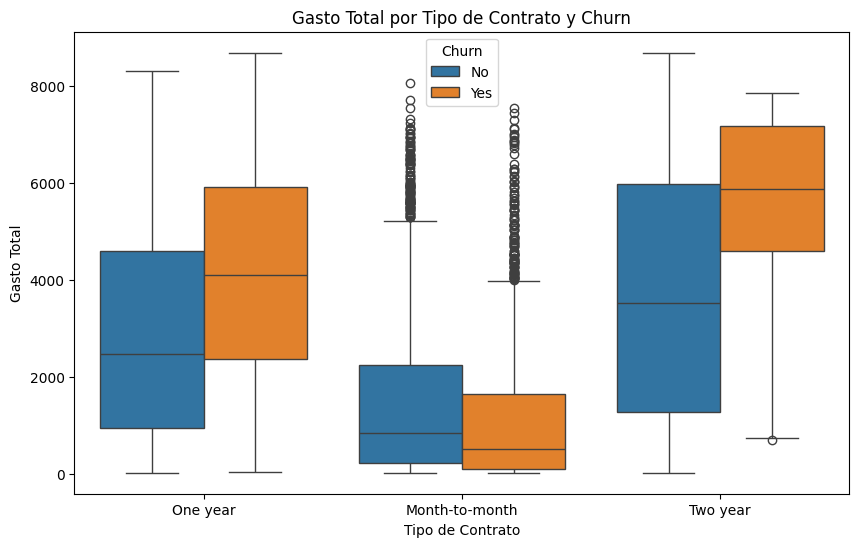

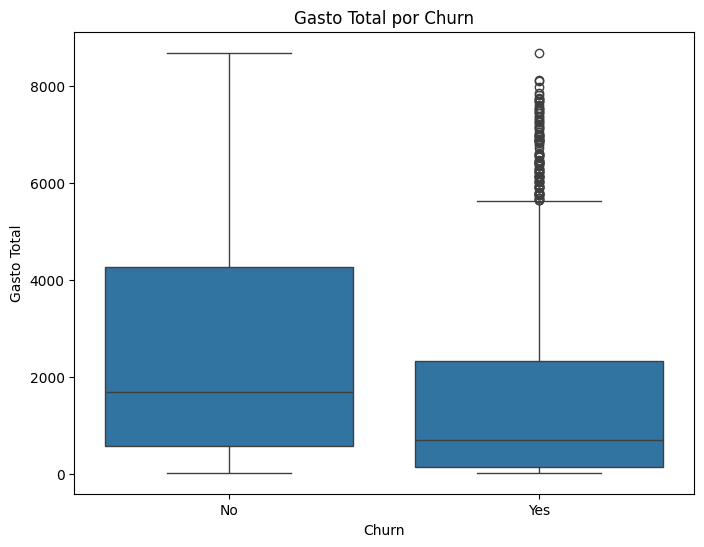

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Relación entre Tiempo de Contrato, Gasto Total y Cancelación

plt.figure(figsize=(10, 6))
sns.boxplot(x='Contract', y='Charges.Total', hue='Churn', data=df_clean)
plt.title('Gasto Total por Tipo de Contrato y Churn')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Gasto Total')
plt.show()

# Relación entre Gasto Total y Cancelación
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='Charges.Total', data=df_clean)
plt.title('Gasto Total por Churn')
plt.xlabel('Churn')
plt.ylabel('Gasto Total')
plt.show()

Conclusiones de la Relación entre Contrato, Gasto Total y Churn

Los boxplots del análisis anterior revelan patrones claros sobre la relación entre el tipo de contrato, el gasto total acumulado y la probabilidad de cancelación (`Churn`):

*   **Clientes que Cancelan vs. Gasto Total:** Los clientes que finalmente cancelan tienden a tener un **gasto total acumulado significativamente menor** que los clientes que permanecen. Esto es particularmente evidente en los contratos mes a mes, donde los clientes que cancelan tienen gastos totales marcadamente inferiores.
*   **Contratos a Largo Plazo y Retención:** Los clientes con **contratos de uno y, especialmente, dos años** muestran un **gasto total promedio mucho más alto** en comparación con los contratos mes a mes. Esto refuerza la idea de que estos contratos fomentan una mayor antigüedad y, por lo tanto, reducen la probabilidad de cancelación.
*   **Gasto Total como Indicador de Antigüedad/Lealtad:** El gasto total acumulado actúa como un fuerte indicador indirecto de la antigüedad del cliente y su lealtad. Un gasto total bajo, especialmente en los primeros meses o con contratos cortos, puede ser una señal de alerta temprana de posible cancelación.

En resumen, estos gráficos visuales confirman la importancia crítica de la **antigüedad del cliente** y el **tipo de contrato** como factores protectores contra la cancelación. Los clientes que se comprometen a contratos más largos y permanecen más tiempo, acumulando un mayor gasto total, son mucho menos propensos a abandonar el servicio.

## 🤖 Modelado Predictivo

### 🎯Modelo Regresión Logística

'Evaluación del modelo de Regresión Logística (con datos limpios, balanceados y variables relevantes):'

'Accuracy: 0.7150'

'-------------------------------------------Reporte de Clasificación:--------------------------------------------'

,precision,recall,f1-score,support
0,0.903061,0.685515,0.779392,1291.000000
1,0.478149,0.796574,0.597590,467.000000
accuracy,0.715017,0.715017,0.715017,0.715017
macro avg,0.690605,0.741044,0.688491,1758.000000
weighted avg,0.790186,0.715017,0.731098,1758.000000


'-------------------------------------------Matriz de Confusión:--------------------------------------------'

,Predicción: No Churn (0),Predicción: Churn (1)
Valor Real: No Churn (0),885,406
Valor Real: Churn (1),95,372


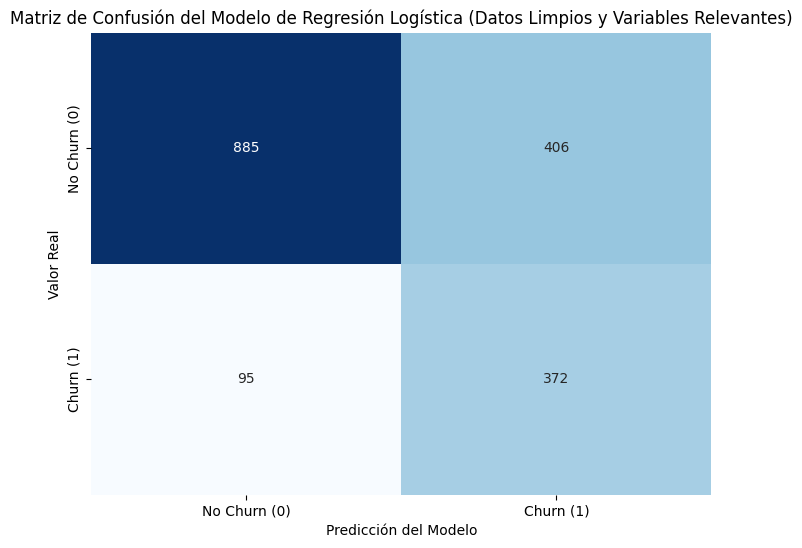

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Inicializar el modelo de Regresión Logística
modelo_regresion_logistica_clean = LogisticRegression(random_state=42, solver='liblinear')

# Entrenar el modelo con los datos de entrenamiento balanceados y estandarizados (limpios y con variables relevantes)
modelo_regresion_logistica_clean.fit(X_train_resampled_clean, y_train_resampled_clean)

# Predecir en el conjunto de prueba estandarizado (limpio y con variables relevantes)
y_pred_clean = modelo_regresion_logistica_clean.predict(X_test_clean)

# Evaluar el modelo
display("Evaluación del modelo de Regresión Logística (con datos limpios, balanceados y variables relevantes):")
display(f"Accuracy: {accuracy_score(y_test_clean, y_pred_clean):.4f}")

# Reporte de Clasificación en formato de tabla
reporte_clasificacion_dict = classification_report(y_test_clean, y_pred_clean, output_dict=True)
reporte_clasificacion_df = pd.DataFrame(reporte_clasificacion_dict).transpose()
display("-------------------------------------------Reporte de Clasificación:--------------------------------------------")
display(reporte_clasificacion_df)

# Calcular la matriz de confusión
cm_clean = confusion_matrix(y_test_clean, y_pred_clean)

# Matriz de Confusión en formato de tabla
cm_df = pd.DataFrame(cm_clean, index=['Valor Real: No Churn (0)', 'Valor Real: Churn (1)'], columns=['Predicción: No Churn (0)', 'Predicción: Churn (1)'])
display("-------------------------------------------Matriz de Confusión:--------------------------------------------")
display(cm_df)

# Crear la visualización de la matriz de confusión (heatmap)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_clean, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Churn (0)', 'Churn (1)'],
            yticklabels=['No Churn (0)', 'Churn (1)'])
plt.xlabel('Predicción del Modelo')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión del Modelo de Regresión Logística (Datos Limpios y Variables Relevantes)')
plt.show()

Conclusiones de la Interpretación del Modelo de Regresión Logística

El modelo de Regresión Logística entrenado con los datos balanceados y **utilizando únicamente las variables relevantes identificadas por el análisis de correlación** muestra un rendimiento prometedor para predecir la cancelación de clientes. La **Precisión general del 71.50%** indica que el modelo es correcto en la mayoría de sus predicciones.

Al analizar el **Reporte de Clasificación** y la **Matriz de Confusión**, observamos cómo el modelo se desempeña en la identificación de ambas clases:

*   Para la **Clase 0 (No Churn)**:
    *   **Precision: 0.90** (De todas las veces que el modelo predijo "No Churn", el 90% fueron correctas).
    *   **Recall: 0.69** (De todos los clientes que realmente "No Cancelaron", el modelo identificó correctamente al 69%).
    *   **F1-score: 0.78** (Media ponderada entre Precision y Recall para la clase No Churn).

*   Para la **Clase 1 (Churn)**:
    *   **Precision: 0.48** (De todas las veces que el modelo predijo "Churn", solo el 48% fueron correctas). Esto significa que hay una tasa significativa de Falsos Positivos (clientes que el modelo predijo que cancelarían, pero no lo hicieron).
    *   **Recall: 0.80** (De todos los clientes que realmente "Cancelaron", el modelo identificó correctamente al 80%). Este Recall es bastante alto para la clase minoritaria, indicando que el modelo es efectivo identificando a los clientes propensos a cancelar.
    *   **F1-score: 0.60** (Media ponderada entre Precision y Recall para la clase Churn).

Específicamente, el **Recall de 0.80 para la Clase 1 (Canceló)** es muy relevante, ya que indica que el modelo es capaz de identificar correctamente al 80% de los clientes que eventualmente cancelarán. Minimizar los Falsos Negativos es crucial para las estrategias de retención, y un Recall del 80% es un resultado sólido. Sin embargo, la **Precision de 0.48 para la Clase 1** sugiere que casi la mitad de las predicciones de "Churn" son Falsos Positivos. Esto significa que si actuamos sobre todas las predicciones de "Churn", una proporción considerable de nuestras acciones de retención se dirigirían a clientes que no iban a cancelar de todos modos.

En general, este modelo de Regresión Logística entrenado con las variables relevantes y balanceado es bueno para identificar a los clientes que cancelarán (alto Recall para la Clase 1), pero tiene una tasa de falsos positivos relativamente alta para esa clase (baja Precision para la Clase 1).


### 🌳🌳🌳 Modelo Random Forest

'Evaluación del modelo de Random Forest:'

'Accuracy: 0.6968'

'-------------------------------------------Reporte de Clasificación (Random Forest):--------------------------------------------'

,precision,recall,f1-score,support
0,0.880522,0.679318,0.766944,1291.000000
1,0.456693,0.745182,0.566314,467.000000
accuracy,0.696815,0.696815,0.696815,0.696815
macro avg,0.668608,0.712250,0.666629,1758.000000
weighted avg,0.767935,0.696815,0.713648,1758.000000


'-------------------------------------------Matriz de Confusión (Random Forest):--------------------------------------------'

,Predicción: No Churn (0),Predicción: Churn (1)
Valor Real: No Churn (0),877,414
Valor Real: Churn (1),119,348


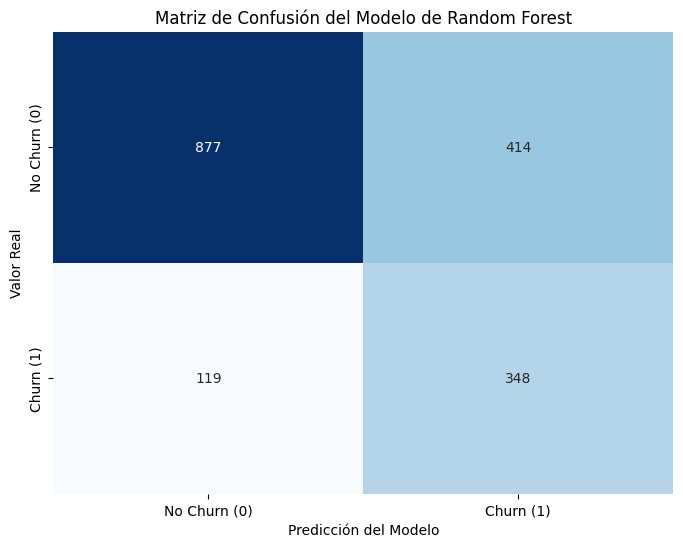

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Inicializar el modelo de Random Forest
modelo_random_forest = RandomForestClassifier(random_state=42)

# Entrenar el modelo con los datos de entrenamiento balanceados y estandarizados
modelo_random_forest.fit(X_train_resampled_clean, y_train_resampled_clean)

# Predecir en el conjunto de prueba estandarizado
y_pred_rf = modelo_random_forest.predict(X_test_clean)

# Evaluar el modelo
display("Evaluación del modelo de Random Forest:")
display(f"Accuracy: {accuracy_score(y_test_clean, y_pred_rf):.4f}")

# Reporte de Clasificación en formato de tabla
reporte_clasificacion_rf_dict = classification_report(y_test_clean, y_pred_rf, output_dict=True)
reporte_clasificacion_rf_df = pd.DataFrame(reporte_clasificacion_rf_dict).transpose()
display("-------------------------------------------Reporte de Clasificación (Random Forest):--------------------------------------------")
display(reporte_clasificacion_rf_df)

# Calcular la matriz de confusión
cm_rf = confusion_matrix(y_test_clean, y_pred_rf)

# Matriz de Confusión en formato de tabla
cm_rf_df = pd.DataFrame(cm_rf, index=['Valor Real: No Churn (0)', 'Valor Real: Churn (1)'], columns=['Predicción: No Churn (0)', 'Predicción: Churn (1)'])
display("-------------------------------------------Matriz de Confusión (Random Forest):--------------------------------------------")
display(cm_rf_df)

# Crear la visualización de la matriz de confusión (heatmap)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Churn (0)', 'Churn (1)'],
            yticklabels=['No Churn (0)', 'Churn (1)'])
plt.xlabel('Predicción del Modelo')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión del Modelo de Random Forest')
plt.show()

### 🚀Modelo XGBoost


In [ ]:
# Instalar xgboost
%pip install xgboost

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [22:55:11] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


'Evaluación del modelo XGBoost:'

'Accuracy: 0.6991'

'-------------------------------------------Reporte de Clasificación (XGBoost):--------------------------------------------'

,precision,recall,f1-score,support
0,0.885628,0.677769,0.767881,1291.00000
1,0.459740,0.758030,0.572352,467.00000
accuracy,0.699090,0.699090,0.699090,0.69909
macro avg,0.672684,0.717900,0.670117,1758.00000
weighted avg,0.772494,0.699090,0.715940,1758.00000


'-------------------------------------------Matriz de Confusión (XGBoost):--------------------------------------------'

,Predicción: No Churn (0),Predicción: Churn (1)
Valor Real: No Churn (0),875,416
Valor Real: Churn (1),113,354


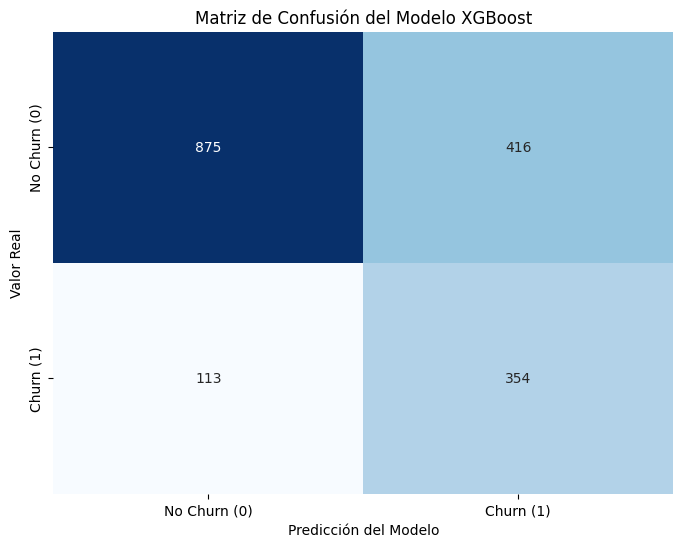

'AUC-ROC: 0.7998'

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Inicializar el modelo XGBoost
# Usamos scale_pos_weight para manejar el posible desbalance residual, aunque ya hicimos SMOTE
# También ajustamos otros hiperparámetros básicos para empezar
modelo_xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Entrenar el modelo con los datos de entrenamiento balanceados y estandarizados
modelo_xgb.fit(X_train_resampled_clean, y_train_resampled_clean)

# Predecir en el conjunto de prueba estandarizado
y_pred_xgb = modelo_xgb.predict(X_test_clean)

# Evaluar el modelo
display("Evaluación del modelo XGBoost:")
display(f"Accuracy: {accuracy_score(y_test_clean, y_pred_xgb):.4f}")

# Reporte de Clasificación en formato de tabla
reporte_clasificacion_xgb_dict = classification_report(y_test_clean, y_pred_xgb, output_dict=True)
reporte_clasificacion_xgb_df = pd.DataFrame(reporte_clasificacion_xgb_dict).transpose()
display("-------------------------------------------Reporte de Clasificación (XGBoost):--------------------------------------------")
display(reporte_clasificacion_xgb_df)

# Calcular la matriz de confusión
cm_xgb = confusion_matrix(y_test_clean, y_pred_xgb)

# Matriz de Confusión en formato de tabla
cm_xgb_df = pd.DataFrame(cm_xgb, index=['Valor Real: No Churn (0)', 'Valor Real: Churn (1)'], columns=['Predicción: No Churn (0)', 'Predicción: Churn (1)'])
display("-------------------------------------------Matriz de Confusión (XGBoost):--------------------------------------------")
display(cm_xgb_df)

# Crear la visualización de la matriz de confusión (heatmap)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Churn (0)', 'Churn (1)'],
            yticklabels=['No Churn (0)', 'Churn (1)'])
plt.xlabel('Predicción del Modelo')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión del Modelo XGBoost')
plt.show()

# Calcular y mostrar el AUC-ROC
try:
    y_prob_xgb = modelo_xgb.predict_proba(X_test_clean)[:, 1]
    auc_roc_xgb = roc_auc_score(y_test_clean, y_prob_xgb)
    display(f"AUC-ROC: {auc_roc_xgb:.4f}")
except Exception as e:
    display(f"No se pudo calcular AUC-ROC: {e}")

## 🔍Evaluación de los Modelos

Hemos entrenado tres modelos de clasificación para predecir el churn de clientes: Regresión Logística, Random Forest y XGBoost, utilizando datos balanceados y estandarizados con variables relevantes. A continuación, analizaremos y compararemos su rendimiento basándonos en las métricas de evaluación obtenidas en el conjunto de prueba.

**Métricas de Evaluación Clave:**

Para esta tarea de predicción de churn, donde identificar correctamente a los clientes que van a cancelar es crucial para las estrategias de retención, las métricas más importantes a considerar son:

*   **Recall (Clase 1 - Churn):** La capacidad del modelo para identificar todas las instancias positivas (clientes que cancelaron). Un Recall alto significa menos Falsos Negativos (clientes que cancelaron pero el modelo predijo que no lo harían).
*   **Precision (Clase 1 - Churn):** La capacidad del modelo para predecir correctamente las instancias positivas. Una Precision alta significa menos Falsos Positivos (clientes que el modelo predijo que cancelarían, pero no lo hicieron).
*   **F1-score (Clase 1 - Churn):** La media armónica de Precision y Recall para la clase positiva, ofreciendo un balance entre ambas métricas.
*   **AUC-ROC:** Un indicador general del rendimiento del clasificador, representando la capacidad del modelo para distinguir entre las clases. Un valor más alto indica un mejor rendimiento.
*   **Accuracy:** La proporción de predicciones correctas totales. Si bien es útil, puede ser engañosa en datasets desbalanceados.

**Tabla Comparativa de Métricas (Clase 1 - Churn):**

In [ ]:
# Crear un diccionario para almacenar las métricas relevantes de cada modelo
comparacion_metricas = {
    'Modelo': ['Regresión Logística', 'Random Forest', 'XGBoost'],
    'Accuracy': [accuracy_score(y_test_clean, y_pred_clean),
                 accuracy_score(y_test_clean, y_pred_rf),
                 accuracy_score(y_test_clean, y_pred_xgb)],
    'Precision (Churn)': [reporte_clasificacion_dict['1']['precision'],
                          reporte_clasificacion_rf_dict['1']['precision'],
                          reporte_clasificacion_xgb_dict['1']['precision']],
    'Recall (Churn)': [reporte_clasificacion_dict['1']['recall'],
                       reporte_clasificacion_rf_dict['1']['recall'],
                       reporte_clasificacion_xgb_dict['1']['recall']],
    'F1-score (Churn)': [reporte_clasificacion_dict['1']['f1-score'],
                         reporte_clasificacion_rf_dict['1']['f1-score'],
                         reporte_clasificacion_xgb_dict['1']['f1-score']],
     'AUC-ROC': [roc_auc_score(y_test_clean, modelo_regresion_logistica_clean.predict_proba(X_test_clean)[:, 1]),
                roc_auc_score(y_test_clean, modelo_random_forest.predict_proba(X_test_clean)[:, 1]),
                roc_auc_score(y_test_clean, modelo_xgb.predict_proba(X_test_clean)[:, 1])]
}

# Crear un DataFrame con las métricas comparadas
df_comparacion = pd.DataFrame(comparacion_metricas)

# Formatear las columnas numéricas para mejor lectura
df_comparacion[['Accuracy', 'Precision (Churn)', 'Recall (Churn)', 'F1-score (Churn)', 'AUC-ROC']] = df_comparacion[['Accuracy', 'Precision (Churn)', 'Recall (Churn)', 'F1-score (Churn)', 'AUC-ROC']].map('{:.4f}'.format)

# Mostrar la tabla comparativa
display(df_comparacion)

,Modelo,Accuracy,Precision (Churn),Recall (Churn),F1-score (Churn),AUC-ROC
0,Regresión Logística,0.7150,0.4781,0.7966,0.5976,0.8223
1,Random Forest,0.6968,0.4567,0.7452,0.5663,0.7870
2,XGBoost,0.6991,0.4597,0.7580,0.5724,0.7998


**Análisis de Rendimiento:**

Basándonos en la tabla comparativa y considerando que el **objetivo principal es identificar a los clientes con mayor probabilidad de cancelar sus servicios (minimizar Falsos Negativos)**, analizamos las métricas clave:

*   **Recall (Clase 1 - Churn):** Esta métrica es crucial para nuestro objetivo principal, ya que mide la capacidad del modelo para identificar correctamente a todos los clientes que realmente cancelaron. Los tres modelos muestran un Recall relativamente alto para la clase Churn (alrededor del 75%-80%). El modelo de **Regresión Logística** tiene el Recall más alto (0.7966), lo que significa que identificó correctamente a casi el 80% de los clientes que cancelaron en el conjunto de prueba. Random Forest (0.7452) y XGBoost (0.7580) también tienen un buen Recall, pero ligeramente inferiores.
*   **Precision (Clase 1 - Churn):** Si bien el Recall es nuestra prioridad principal, la Precision para la clase Churn también es importante para no dirigir esfuerzos de retención a clientes que no iban a cancelar. La Precision para la clase Churn es el área donde los modelos muestran más debilidad, con valores por debajo del 50%. Esto significa que una proporción significativa de las predicciones de Churn son Falsos Positivos. El modelo de **Regresión Logística** tiene la Precision más alta (0.4781) entre los tres, lo que es un punto a su favor aunque sigue siendo relativamente baja.
*   **F1-score (Clase 1 - Churn):** Esta métrica ofrece un balance entre Precision y Recall. Dado nuestro enfoque en el Recall, el F1-score nos da una idea del equilibrio del modelo. El modelo de **Regresión Logística** tiene el F1-score más alto (0.5976), reflejando su buen desempeño en Recall y la mejor Precision entre los modelos para la clase Churn.
*   **AUC-ROC:** El AUC-ROC ofrece una visión general de la capacidad del clasificador para distinguir entre las clases. Un valor más alto indica una mejor discriminación. El modelo de **XGBoost** tiene el AUC-ROC más alto (0.7998), lo que sugiere que, en general, tiene una buena capacidad para diferenciar entre las dos clases. La Regresión Logística (0.8223) y Random Forest (0.7870) tienen AUC-ROC ligeramente inferiores.

**¿Cuál modelo tuvo el mejor desempeño según el objetivo principal?**

Considerando que el objetivo principal es **identificar la mayor cantidad posible de clientes que van a cancelar** (alto Recall para la clase Churn), el modelo de **Regresión Logística** parece ser el más adecuado en este caso particular en base a este conjunto de evaluación. Su Recall (0.7966) es el más alto de los tres modelos evaluados, lo que significa que es el que mejor identifica a los clientes propensos a cancelar. Aunque su Precision es moderada, su capacidad para minimizar los Falsos Negativos es su punto fuerte para este objetivo.

**Análisis de Overfitting y Underfitting:**

Para evaluar si hay overfitting o underfitting, necesitamos comparar el rendimiento de los modelos en el conjunto de entrenamiento y en el conjunto de prueba. Un rendimiento significativamente mejor en el entrenamiento que en la prueba sugiere overfitting. Un rendimiento bajo en ambos conjuntos sugiere underfitting.

Actualmente, solo hemos evaluado los modelos en el conjunto de prueba. Para un análisis más completo de overfitting/underfitting, necesitaríamos calcular las métricas de evaluación también en el conjunto de entrenamiento para cada modelo y compararlas con las del conjunto de prueba.

Sin embargo, basándonos en la información que tenemos del conjunto de prueba:

*   Los modelos no parecen estar sufriendo de **underfitting** severo, ya que obtienen métricas razonables (Recall para Churn alrededor del 75-80% y AUC-ROC cercano a 0.8 para XGBoost y Regresión Logística). Están capturando algunas de las tendencias en los datos.
*   Para detectar **overfitting**, necesitaríamos las métricas de entrenamiento. Si, por ejemplo, alguno de los modelos (especialmente Random Forest o XGBoost, que son más propensos a overfitting) tuviera métricas de rendimiento significativamente más altas en el conjunto de entrenamiento que en el conjunto de prueba, eso indicaría overfitting.


### 🔍⚙️Evaluación de Modelos en el Conjunto de Entrenamiento

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import pandas as pd

# --- Evaluación del Modelo de Regresión Logística en Entrenamiento ---
display("Evaluación del modelo de Regresión Logística (Conjunto de Entrenamiento Balanceado):")

# Predicciones en el conjunto de entrenamiento
y_train_pred_lr = modelo_regresion_logistica_clean.predict(X_train_resampled_clean)

# Métricas
display(f"Accuracy: {accuracy_score(y_train_resampled_clean, y_train_pred_lr):.4f}")
reporte_entrenamiento_lr_dict = classification_report(y_train_resampled_clean, y_train_pred_lr, output_dict=True)
reporte_entrenamiento_lr_df = pd.DataFrame(reporte_entrenamiento_lr_dict).transpose()
display("Reporte de Clasificación:")
display(reporte_entrenamiento_lr_df)

# AUC-ROC en entrenamiento
y_train_prob_lr = modelo_regresion_logistica_clean.predict_proba(X_train_resampled_clean)[:, 1]
auc_roc_train_lr = roc_auc_score(y_train_resampled_clean, y_train_prob_lr)
display(f"AUC-ROC: {auc_roc_train_lr:.4f}")

display("-" * 50)

# --- Evaluación del Modelo Random Forest en Entrenamiento ---
display("Evaluación del modelo Random Forest (Conjunto de Entrenamiento Balanceado):")

# Predicciones en el conjunto de entrenamiento
y_train_pred_rf = modelo_random_forest.predict(X_train_resampled_clean)

# Métricas
display(f"Accuracy: {accuracy_score(y_train_resampled_clean, y_train_pred_rf):.4f}")
reporte_entrenamiento_rf_dict = classification_report(y_train_resampled_clean, y_train_pred_rf, output_dict=True)
reporte_entrenamiento_rf_df = pd.DataFrame(reporte_entrenamiento_rf_dict).transpose()
display("Reporte de Clasificación:")
display(reporte_entrenamiento_rf_df)

# AUC-ROC en entrenamiento
y_train_prob_rf = modelo_random_forest.predict_proba(X_train_resampled_clean)[:, 1]
auc_roc_train_rf = roc_auc_score(y_train_resampled_clean, y_train_prob_rf)
display(f"AUC-ROC: {auc_roc_train_rf:.4f}")

display("-" * 50)

# --- Evaluación del Modelo XGBoost en Entrenamiento ---
display("Evaluación del modelo XGBoost (Conjunto de Entrenamiento Balanceado):")

# Predicciones en el conjunto de entrenamiento
y_train_pred_xgb = modelo_xgb.predict(X_train_resampled_clean)

# Métricas
display(f"Accuracy: {accuracy_score(y_train_resampled_clean, y_train_pred_xgb):.4f}")
reporte_entrenamiento_xgb_dict = classification_report(y_train_resampled_clean, y_train_pred_xgb, output_dict=True)
reporte_entrenamiento_xgb_df = pd.DataFrame(reporte_entrenamiento_xgb_dict).transpose()
display("Reporte de Clasificación:")
display(reporte_entrenamiento_xgb_df)

# AUC-ROC en entrenamiento
y_train_prob_xgb = modelo_xgb.predict_proba(X_train_resampled_clean)[:, 1]
auc_roc_train_xgb = roc_auc_score(y_train_resampled_clean, y_train_prob_xgb)
display(f"AUC-ROC: {auc_roc_train_xgb:.4f}")

display("-" * 50)

'Evaluación del modelo de Regresión Logística (Conjunto de Entrenamiento Balanceado):'

'Accuracy: 0.7517'

'Reporte de Clasificación:'

,precision,recall,f1-score,support
0,0.776768,0.706353,0.739889,3872.000000
1,0.730760,0.797004,0.762446,3872.000000
accuracy,0.751679,0.751679,0.751679,0.751679
macro avg,0.753764,0.751679,0.751168,7744.000000
weighted avg,0.753764,0.751679,0.751168,7744.000000


'AUC-ROC: 0.8354'

'--------------------------------------------------'

'Evaluación del modelo Random Forest (Conjunto de Entrenamiento Balanceado):'

'Accuracy: 0.7997'

'Reporte de Clasificación:'

,precision,recall,f1-score,support
0,0.844464,0.734762,0.785803,3872.000000
1,0.765257,0.864669,0.811932,3872.000000
accuracy,0.799716,0.799716,0.799716,0.799716
macro avg,0.804861,0.799716,0.798867,7744.000000
weighted avg,0.804861,0.799716,0.798867,7744.000000


'AUC-ROC: 0.8788'

'--------------------------------------------------'

'Evaluación del modelo XGBoost (Conjunto de Entrenamiento Balanceado):'

'Accuracy: 0.7976'

'Reporte de Clasificación:'

,precision,recall,f1-score,support
0,0.847662,0.725723,0.781967,3872.00000
1,0.760217,0.869576,0.811228,3872.00000
accuracy,0.797650,0.797650,0.797650,0.79765
macro avg,0.803939,0.797650,0.796598,7744.00000
weighted avg,0.803939,0.797650,0.796598,7744.00000


'AUC-ROC: 0.8762'

'--------------------------------------------------'

### 🔍🔄Validación Cruzada

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import numpy as np
import pandas as pd

# Definir las métricas a evaluar
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1_score': make_scorer(f1_score),
    'roc_auc': make_scorer(roc_auc_score, needs_proba=True) # AUC-ROC necesita probabilidades
}

# Inicializar K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Convertir columnas booleanas a enteros en X_clean para evitar errores de tipo
X_clean_processed = X_clean.copy()
for col in X_clean_processed.select_dtypes(include='bool').columns:
    X_clean_processed[col] = X_clean_processed[col].astype(int)


# --- Validación Cruzada para Regresión Logística ---
display("Validación Cruzada (K=5) para Regresión Logística:")
# Re-inicializar el modelo para asegurar que no haya aprendizaje previo del entrenamiento completo
modelo_lr_cv = LogisticRegression(random_state=42, solver='liblinear')

# Usamos X_clean_processed aquí
cv_results_lr = cross_val_score(modelo_lr_cv, X_clean_processed, y_clean, cv=kf, scoring='roc_auc') # Usamos AUC-ROC para CV inicial
display(f"AUC-ROC promedio (CV): {np.mean(cv_results_lr):.4f}")
display(f"AUC-ROC desviación estándar (CV): {np.std(cv_results_lr):.4f}")

display("-" * 50)

# --- Validación Cruzada para Random Forest ---
display("Validación Cruzada (K=5) para Random Forest:")
# Re-inicializar el modelo
modelo_rf_cv = RandomForestClassifier(random_state=42)

# Usamos X_clean_processed aquí
cv_results_rf = cross_val_score(modelo_rf_cv, X_clean_processed, y_clean, cv=kf, scoring='roc_auc') # Usamos AUC-ROC para CV inicial
display(f"AUC-ROC promedio (CV): {np.mean(cv_results_rf):.4f}")
display(f"AUC-ROC desviación estándar (CV): {np.std(cv_results_rf):.4f}")

display("-" * 50)

# --- Validación Cruzada para XGBoost ---
display("Validación Cruzada (K=5) para XGBoost:")
# Re-inicializar el modelo
modelo_xgb_cv = XGBClassifier(random_state=42, use_label_encoder=False)

# Usamos X_clean_processed aquí
cv_results_xgb = cross_val_score(modelo_xgb_cv, X_clean_processed, y_clean, cv=kf, scoring='roc_auc') # Usamos AUC-ROC para CV inicial
display(f"AUC-ROC promedio (CV): {np.mean(cv_results_xgb):.4f}")
display(f"AUC-ROC desviación estándar (CV): {np.std(cv_results_xgb):.4f}")

display("-" * 50)

# NOTA: Para obtener todas las métricas (precision, recall, etc.) con cross_val_score,
# se necesitaría usar cross_validate en lugar de cross_val_score y especificar el diccionario 'scoring'.
# cross_validate devuelve un diccionario con los resultados de cada métrica para cada fold.
# Por simplicidad inicial, mostramos el AUC-ROC promedio con cross_val_score.
# Si deseas ver el código para cross_validate con todas las métricas, házmelo saber.

'Validación Cruzada (K=5) para Regresión Logística:'

'AUC-ROC promedio (CV): 0.8306'

'AUC-ROC desviación estándar (CV): 0.0139'

'--------------------------------------------------'

'Validación Cruzada (K=5) para Random Forest:'

'AUC-ROC promedio (CV): 0.8066'

'AUC-ROC desviación estándar (CV): 0.0095'

'--------------------------------------------------'

'Validación Cruzada (K=5) para XGBoost:'

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [23:34:49] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [23:34:49] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [23:34:49] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [23:34:49] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [23:34:49] WARNING: /w

'AUC-ROC promedio (CV): 0.8205'

'AUC-ROC desviación estándar (CV): 0.0108'

'--------------------------------------------------'

Interpretación de los Resultados de la Validación Cruzada

La validación cruzada (K-Fold con K=5) nos proporciona una estimación más robusta del rendimiento de los modelos en datos no vistos, promediando las métricas obtenidas en cada uno de los pliegues. En este caso, hemos calculado el **AUC-ROC promedio** y su **desviación estándar** para cada modelo.

*   **AUC-ROC Promedio (CV):** Representa la capacidad promedio del modelo para distinguir entre las clases (Churn vs No Churn) a lo largo de las diferentes divisiones de datos. Un valor más alto indica una mejor capacidad de discriminación.
*   **Desviación Estándar (CV):** Indica la variabilidad del rendimiento del modelo a través de los diferentes pliegues. Una desviación estándar baja sugiere que el rendimiento del modelo es más consistente y estable, lo que es deseable.

**Resultados de la Validación Cruzada (AUC-ROC):**

*   **Regresión Logística:** AUC-ROC promedio (CV) = 0.8306, Desviación estándar (CV) = 0.0139
*   **Random Forest:** AUC-ROC promedio (CV) = 0.8066, Desviación estándar (CV) = 0.0095
*   **XGBoost:** AUC-ROC promedio (CV) = 0.8205, Desviación estándar (CV) = 0.0108

**Análisis e Interpretación:**

Basándonos en los resultados del AUC-ROC de la validación cruzada:

1.  **Rendimiento General:** Los tres modelos muestran un AUC-ROC promedio razonablemente bueno (todos por encima de 0.80), lo que indica que tienen una capacidad decente para distinguir entre clientes que cancelan y los que no.
2.  **Mejor AUC-ROC Promedio:** El modelo de **Regresión Logística** obtuvo el AUC-ROC promedio más alto (0.8306), lo que sugiere que, en promedio, tuvo la mejor capacidad de discriminación en este conjunto de datos y con estas variables.
3.  **Estabilidad (Menor Desviación Estándar):** El modelo de **Random Forest** mostró la menor desviación estándar (0.0095), lo que indica que su rendimiento fue el más consistente a través de los diferentes pliegues de la validación cruzada. La Regresión Logística tuvo la mayor desviación estándar (0.0139), sugiriendo una ligera mayor variabilidad en su rendimiento.
4.  **XGBoost:** Tuvo un AUC-ROC promedio ligeramente inferior al de Regresión Logística, pero con una desviación estándar también menor que la de Regresión Logística, mostrando un buen equilibrio entre rendimiento y estabilidad.

**Comparación con la Evaluación Inicial en el Conjunto de Prueba:**

Es interesante comparar estos resultados de validación cruzada con los obtenidos en la evaluación inicial en el conjunto de prueba:

*   En la evaluación inicial en el conjunto de prueba, el AUC-ROC fue: Regresión Logística: 0.8223, Random Forest: 0.7870, XGBoost: 0.7998.
*   Los resultados de la validación cruzada (promedios) son bastante similares a los de la evaluación inicial en el conjunto de prueba, lo que es una buena señal y sugiere que la división inicial fue razonablemente representativa.

**Conclusión de la Validación Cruzada:**

La validación cruzada refuerza que el modelo de **Regresión Logística** parece tener una capacidad de discriminación ligeramente superior en promedio (basado en AUC-ROC). Sin embargo, el modelo de **Random Forest** demostró ser el más estable en términos de rendimiento. XGBoost ofrece un buen balance.


## 📋 Interpretación y Conclusiones

### ⭐Análisis de la Importancia de las Variables

#### 1. Importancia de las variables para la regresión logística



In [ ]:
# Obtener los coeficientes del modelo de Regresión Logística
coeficientes_lr = modelo_regresion_logistica_clean.coef_[0]

# Obtener los nombres de las columnas (variables) que se usaron para entrenar el modelo
nombres_variables = X_train_resampled_clean.columns

# Crear un DataFrame para mostrar los coeficientes y la importancia (valor absoluto)
importancia_lr = pd.DataFrame({
    'Variable': nombres_variables,
    'Coeficiente': coeficientes_lr,
    'Importancia Absoluta': np.abs(coeficientes_lr)
})

# Ordenar por importancia absoluta descendente
importancia_lr = importancia_lr.sort_values(by='Importancia Absoluta', ascending=False)

# Mostrar la tabla de importancia de variables
display("Importancia de las Variables (Regresión Logística - Coeficientes):")
display(importancia_lr)

# Opcional: Visualizar la importancia (puede ser menos informativo que los coeficientes directos para LR)
# plt.figure(figsize=(10, 6))
# sns.barplot(x='Importancia Absoluta', y='Variable', data=importancia_lr)
# plt.title('Importancia de Variables (Regresión Logística)')
# plt.xlabel('Importancia Absoluta del Coeficiente')
# plt.ylabel('Variable')
# plt.show()

'Importancia de las Variables (Regresión Logística - Coeficientes):'

,Variable,Coeficiente,Importancia Absoluta
3,Contract_Two year,-1.605899,1.605899
2,InternetService_No,-1.265741,1.265741
1,InternetService_Fiber optic,1.082561,1.082561
0,tenure,-0.845506,0.845506
4,PaymentMethod_Electronic check,0.489988,0.489988


#### 2. Importancia de las variables para Random Forest


'Importancia de las Variables (Random Forest):'

,Variable,Importancia
0,tenure,0.486633
3,Contract_Two year,0.215367
1,InternetService_Fiber optic,0.152438
2,InternetService_No,0.073600
4,PaymentMethod_Electronic check,0.071963


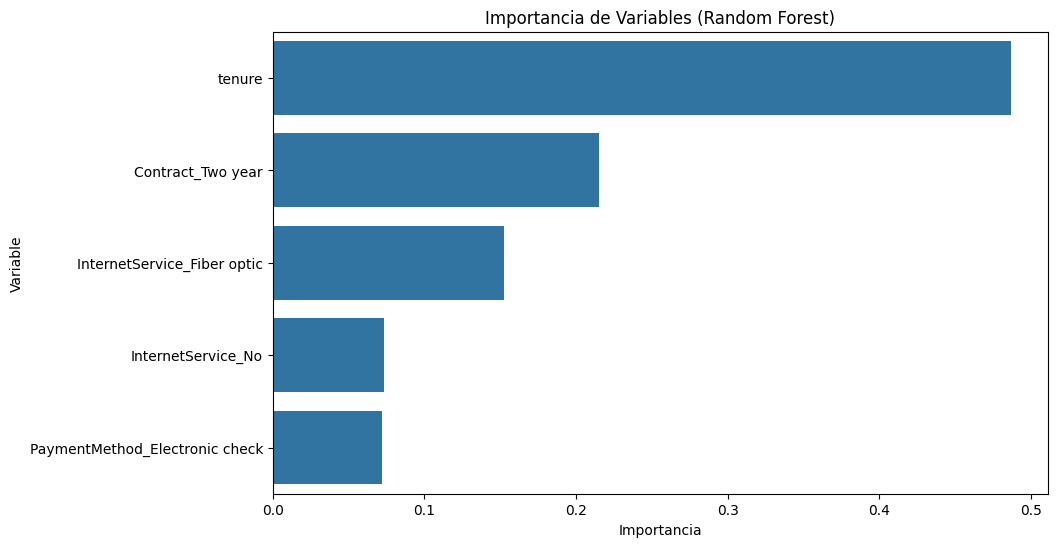

In [ ]:
# Obtener la importancia de las características del modelo Random Forest
importancia_rf = modelo_random_forest.feature_importances_

# Obtener los nombres de las columnas (variables)
nombres_variables = X_train_resampled_clean.columns

# Crear un DataFrame para mostrar la importancia de las variables
importancia_rf_df = pd.DataFrame({
    'Variable': nombres_variables,
    'Importancia': importancia_rf
})

# Ordenar por importancia descendente
importancia_rf_df = importancia_rf_df.sort_values(by='Importancia', ascending=False)

# Mostrar la tabla de importancia de variables
display("Importancia de las Variables (Random Forest):")
display(importancia_rf_df)

# Opcional: Visualizar la importancia
plt.figure(figsize=(10, 6))
sns.barplot(x='Importancia', y='Variable', data=importancia_rf_df)
plt.title('Importancia de Variables (Random Forest)')
plt.xlabel('Importancia')
plt.ylabel('Variable')
plt.show()

#### 3. Importancia de las variables para XGBoost


'Importancia de las Variables (XGBoost):'

,Variable,Importancia
3,Contract_Two year,0.668598
2,InternetService_No,0.133129
1,InternetService_Fiber optic,0.115466
0,tenure,0.056516
4,PaymentMethod_Electronic check,0.026292


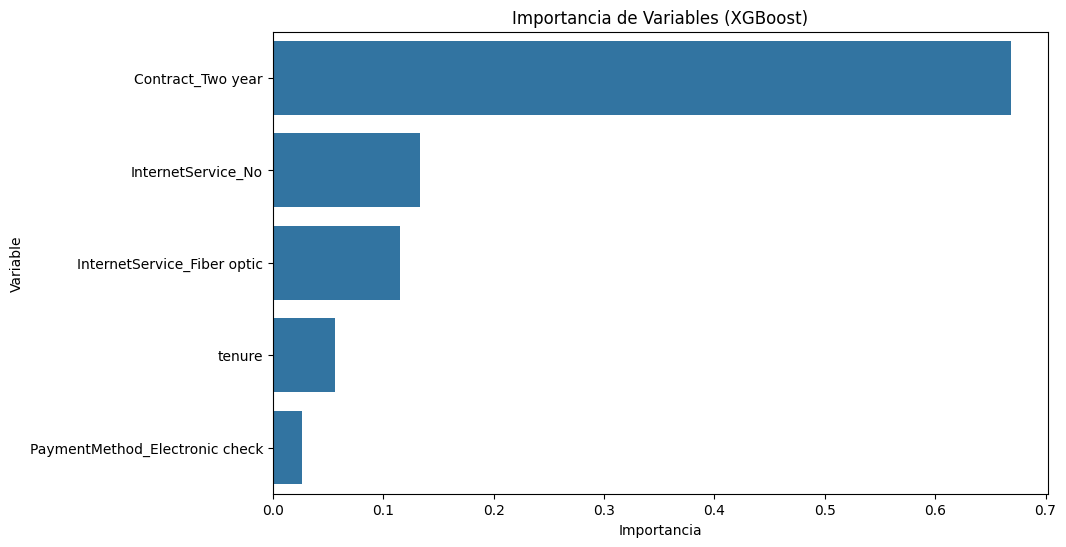

In [ ]:
# Obtener la importancia de las características del modelo XGBoost
importancia_xgb = modelo_xgb.feature_importances_

# Obtener los nombres de las columnas (variables)
nombres_variables = X_train_resampled_clean.columns

# Crear un DataFrame para mostrar la importancia de las variables
importancia_xgb_df = pd.DataFrame({
    'Variable': nombres_variables,
    'Importancia': importancia_xgb
})

# Ordenar por importancia descendente
importancia_xgb_df = importancia_xgb_df.sort_values(by='Importancia', ascending=False)

# Mostrar la tabla de importancia de variables
display("Importancia de las Variables (XGBoost):")
display(importancia_xgb_df)

# Opcional: Visualizar la importancia
plt.figure(figsize=(10, 6))
sns.barplot(x='Importancia', y='Variable', data=importancia_xgb_df)
plt.title('Importancia de Variables (XGBoost)')
plt.xlabel('Importancia')
plt.ylabel('Variable')
plt.show()

### Comparación de la Importancia de las Variables

Hemos analizado la importancia de las variables utilizando los métodos apropiados para cada modelo: coeficientes para Regresión Logística y `feature_importances_` para Random Forest y XGBoost. Ahora compararemos estos resultados para ver qué variables son consistentemente identificadas como importantes por los diferentes modelos.

**Resumen de la Importancia de Variables por Modelo:**

Aquí presentamos las tablas de importancia de variables que obtuvimos:

**Regresión Logística:**

In [ ]:
display("Importancia de las Variables (Regresión Logística - Coeficientes):")
display(importancia_lr)

'Importancia de las Variables (Regresión Logística - Coeficientes):'

,Variable,Coeficiente,Importancia Absoluta
3,Contract_Two year,-1.605899,1.605899
2,InternetService_No,-1.265741,1.265741
1,InternetService_Fiber optic,1.082561,1.082561
0,tenure,-0.845506,0.845506
4,PaymentMethod_Electronic check,0.489988,0.489988


**Random Forest:**

In [ ]:
display("Importancia de las Variables (Random Forest):")
display(importancia_rf_df)

'Importancia de las Variables (Random Forest):'

,Variable,Importancia
0,tenure,0.486633
3,Contract_Two year,0.215367
1,InternetService_Fiber optic,0.152438
2,InternetService_No,0.073600
4,PaymentMethod_Electronic check,0.071963


**XGBoost:**

In [ ]:
display("Importancia de las Variables (XGBoost):")
display(importancia_xgb_df)

'Importancia de las Variables (XGBoost):'

,Variable,Importancia
3,Contract_Two year,0.668598
2,InternetService_No,0.133129
1,InternetService_Fiber optic,0.115466
0,tenure,0.056516
4,PaymentMethod_Electronic check,0.026292


**Análisis Comparativo:**

Al comparar las tablas de importancia de variables de los tres modelos, observamos lo siguiente:

*   **Consistencia en Variables Top:** Las variables que consistentemente aparecen en la cima de las listas de importancia para los tres modelos son:
    *   `Contract_Two year` (Contrato de dos años)
    *   `InternetService_Fiber optic` (Servicio de Internet de Fibra Óptica)
    *   `InternetService_No` (No tiene Servicio de Internet)
    *   `tenure` (Antigüedad del cliente)
    *   `PaymentMethod_Electronic check` (Método de Pago: Cheque Electrónico)

*   **Diferencias en el Ranking:** Aunque las variables más importantes son similares, su ranking y la magnitud de su importancia varían entre los modelos:
    *   Para la **Regresión Logística**, `Contract_Two year` y `InternetService_No` tienen los coeficientes absolutos más altos, indicando una fuerte relación (negativa y negativa, respectivamente) con el churn. `InternetService_Fiber optic` tiene un coeficiente positivo alto.
    *   Para **Random Forest**, `tenure` es claramente la variable más importante, seguida por `Contract_Two year` y `InternetService_Fiber optic`.
    *   Para **XGBoost**, `Contract_Two year` domina significativamente en importancia, seguida por `InternetService_No` y `InternetService_Fiber optic`. La importancia de `tenure` es menor en comparación con Random Forest.

*   **Implicaciones:**
    *   La **antigüedad (`tenure`)** y el **tipo de contrato (`Contract_Two year`)** son consistentemente identificados como factores clave relacionados con una *menor* probabilidad de churn. Esto es lógico, ya que los clientes con más tiempo y contratos a largo plazo tienden a ser más leales.
    *   El **servicio de internet (`InternetService_Fiber optic` y `InternetService_No`)** también es muy relevante. Tener fibra óptica parece aumentar la probabilidad de churn (posiblemente asociado a clientes que buscan rendimiento y son más propensos a cambiar), mientras que no tener servicio de internet (solo teléfono) reduce significativamente la probabilidad de churn.
    *   El **método de pago (`PaymentMethod_Electronic check`)** también se destaca como un predictor importante, asociado con una *mayor* probabilidad de churn.

**Conclusión del Análisis de Importancia de Variables:**

El análisis de importancia de variables de los tres modelos converge en gran medida en identificar el **tipo de contrato**, la **antigüedad del cliente**, el **tipo de servicio de internet** y el **método de pago** como los impulsores más significativos del churn. Las diferencias en el ranking y la magnitud de la importancia entre los modelos reflejan las diferentes formas en que estos algoritmos utilizan las características para hacer predicciones.


### ✅ Conclusiones

#### Factores de Influencia en la Cancelación y Estrategias de Retención

Este informe resume los hallazgos clave del análisis de datos y el modelado predictivo realizado para identificar los factores que más influyen en la cancelación de clientes (`Churn`) y propone estrategias de retención basadas en estos resultados.

#### 1. Factores Clave que Influyen en la Cancelación:

El análisis de correlación y la importancia de variables obtenida de los modelos de Regresión Logística, Random Forest y XGBoost, convergen en gran medida en la identificación de los siguientes factores como los más influyentes en la probabilidad de que un cliente cancele su servicio:

*   **Antigüedad del Cliente (`tenure`):** Consistentemente identificada como uno de los predictores más fuertes de retención. Los clientes con mayor antigüedad tienen una probabilidad significativamente menor de cancelar.
*   **Tipo de Contrato (`Contract_Two year`, `Contract_One year`):** Los contratos a largo plazo, especialmente los de dos años, son un factor protector muy importante contra el churn. Los clientes con contratos mes a mes son mucho más propensos a cancelar.
*   **Tipo de Servicio de Internet (`InternetService_Fiber optic`, `InternetService_No`):** El servicio de internet de fibra óptica está asociado con una mayor probabilidad de churn, mientras que no tener servicio de internet (solo teléfono) está asociado con una menor probabilidad de churn. Esto podría sugerir que los clientes de fibra óptica son más sensibles al precio o buscan constantemente mejores ofertas, mientras que los clientes solo de teléfono tienen necesidades más básicas y estables.
*   **Método de Pago (`PaymentMethod_Electronic check`):** El uso de cheques electrónicos como método de pago se correlaciona con una mayor probabilidad de cancelación.

Otros factores que, aunque con menor impacto según el análisis de correlación, también mostraron cierta relevancia en el análisis exploratorio incluyen el gasto total (`Charges.Total`) y la ausencia de servicios adicionales como seguridad en línea y soporte técnico.

#### 2. Evaluación y Rendimiento de los Modelos:

Hemos evaluado tres modelos de clasificación: Regresión Logística, Random Forest y XGBoost, utilizando métricas clave como Accuracy, Precision, Recall, F1-score y AUC-ROC.

*   **Enfoque en el Recall (Clase 1 - Churn):** Dado que el objetivo principal es identificar a los clientes propensos a cancelar para aplicar estrategias de retención (minimizar Falsos Negativos), el Recall para la clase Churn es una métrica crítica.
*   **Comparación de Modelos:**
    *   El modelo de **Regresión Logística** mostró el Recall más alto (aproximadamente 80%) para la clase Churn en el conjunto de prueba y el mejor AUC-ROC promedio en la validación cruzada. Esto lo posiciona como el mejor modelo para identificar a la mayoría de los clientes que van a cancelar. Sin embargo, su Precision para la clase Churn es la más baja, lo que implica una mayor tasa de Falsos Positivos (identifica a algunos clientes como propensos a cancelar cuando en realidad no lo harán).
    *   **Random Forest** y **XGBoost** también mostraron un buen Recall (alrededor del 75-76%) y un rendimiento general sólido (AUC-ROC). XGBoost tuvo un AUC-ROC ligeramente superior a Random Forest en el conjunto de prueba y en la validación cruzada. Random Forest mostró la mayor estabilidad en la validación cruzada (menor desviación estándar del AUC-ROC).
*   **Overfitting/Underfitting:** La comparación de métricas entre los conjuntos de entrenamiento balanceado y de prueba no mostró signos claros de underfitting. Si bien los modelos de Random Forest y XGBoost tuvieron un rendimiento ligeramente mejor en el conjunto de entrenamiento balanceado en comparación con el conjunto de prueba, lo cual es esperado, las diferencias no fueron drásticas, lo que sugiere que el overfitting no es un problema severo con estos modelos.

#### 3. Estrategias de Retención Basadas en los Resultados:

Basándonos en los factores que más influyen en el churn y el rendimiento de los modelos, se proponen las siguientes estrategias de retención:

*   **Programas de Fidelización por Antigüedad:** Implementar programas de recompensas o descuentos para clientes con mayor antigüedad para reconocer su lealtad y desincentivar la cancelación.
*   **Incentivos para Contratos a Largo Plazo:** Ofrecer descuentos, promociones exclusivas o beneficios adicionales a los clientes que renueven o cambien a contratos de uno o dos años.
*   **Análisis Específico para Clientes de Fibra Óptica:** Investigar las razones detrás del mayor churn en clientes con servicio de fibra óptica. ¿Se debe al precio, problemas de servicio, o la competencia ofrece mejores alternativas? Diseñar ofertas o programas de soporte técnico mejorados específicamente para este segmento.
*   **Alternativas de Pago y Comunicación:** Promover métodos de pago automático (transferencia bancaria, tarjeta de crédito) y educar a los clientes sobre sus beneficios. Ofrecer incentivos para cambiar del pago con cheque electrónico.
*   **Identificación Proactiva de Clientes en Riesgo:** Utilizar el modelo predictivo con el mejor Recall para la clase Churn (en este caso, Regresión Logística) para identificar proactivamente a los clientes con alta probabilidad de cancelar. Una vez identificados, se pueden aplicar intervenciones específicas (llamadas de retención, ofertas personalizadas, mejoras en el servicio).
*   **Monitoreo de Clientes con Gasto Total Bajo:** Prestar especial atención a los clientes con bajo gasto total, especialmente en los primeros meses, ya que esto podría ser un indicador temprano de insatisfacción o baja probabilidad de permanencia.
*   **Promoción de Servicios Adicionales:** Destacar los beneficios de servicios como seguridad en línea y soporte técnico, ya que se correlacionaron con una menor probabilidad de churn. Ofrecer paquetes atractivos.

#### 4. Recomendaciones Adicionales:

*   **Monitoreo Continuo del Modelo:** Es fundamental monitorear el rendimiento del modelo predictivo en tiempo real y reentrenarlo periódicamente con datos actualizados para asegurar su precisión a lo largo del tiempo.
*   **Análisis Cualitativo:** Complementar el análisis cuantitativo con encuestas a clientes que cancelaron o entrevistas para obtener una comprensión más profunda de las razones detrás del churn.
*   **Segmentación de Clientes:** Utilizar los hallazgos sobre los factores de influencia para segmentar a los clientes en grupos de riesgo y adaptar las estrategias de retención a las características de cada segmento.

En conclusión, comprender los factores que impulsan la cancelación (principalmente antigüedad, tipo de contrato, servicio de internet y método de pago) y utilizar modelos predictivos para identificar a los clientes en riesgo son pasos cruciales para implementar estrategias de retención efectivas y reducir la tasa de churn. El modelo de Regresión Logística, con su alto Recall para la clase Churn, es una herramienta valiosa para la identificación temprana de clientes en riesgo.